In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            print(sys.path)

C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\openset openset
C:\Users\Bhujay_ROG\MyDev\OCLog\oclog oclog
C:\Users\Bhujay_ROG\MyDev\OCLog OCLog
['C:\\Users\\Bhujay_ROG\\MyDev\\OCLog\\oclog\\openset\\notebooks', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\\python39.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\Bhujay_ROG\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0', 'C:\\Users\\Bhujay_ROG\\venv1', '', 'C:\\Users\\Bhujay_ROG\\venv1\\lib\\site-packages', 'C:\\Users\\Bhujay_ROG\\venv1\\lib\\site-packages\\win32', 'C:\\Users\\Bhujay_ROG\\venv1\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Bhujay_ROG\\venv1\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Bhujay_ROG\\MyDev\\OCLog']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
from oclog.openset.openset import OpenSet
from oclog.openset.opensetv2 import OpenSet as osetv2

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=2) 

vocab_size: 50
Epoch 1/2
100/100 [==============================] - 11s 106ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/2
100/100 [==============================] - 10s 100ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940


In [5]:
oset = OpenSet(4, ptmodel) 
# oset = osetv2(4, ptmodel)
oset.train(train_data, epochs=300, lr_rate = 0.95)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.16it/s]


epoch: 1/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 2/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 3/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 4/300, train_loss: 5.8242506980896


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 5/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 6/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 7/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 8/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 9/300, train_loss: 5.824248790740967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 10/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 11/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 12/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 13/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 14/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 15/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 16/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 17/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 18/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 19/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 20/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 21/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 22/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 23/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 24/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 25/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 26/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 27/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 28/300, train_loss: 5.824249267578125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 29/300, train_loss: 5.824249267578125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 30/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 31/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.02it/s]


epoch: 32/300, train_loss: 5.8242363929748535


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.13it/s]


epoch: 33/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23it/s]


epoch: 34/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 35/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 36/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 37/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.81it/s]


epoch: 38/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 39/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 40/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 41/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 42/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 43/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 44/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 45/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.00it/s]


epoch: 46/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.77it/s]


epoch: 47/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.44it/s]


epoch: 48/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.98it/s]


epoch: 49/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.84it/s]


epoch: 50/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.06it/s]


epoch: 51/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 52/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.18it/s]


epoch: 53/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 54/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


epoch: 55/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 56/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 57/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.89it/s]


epoch: 58/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.86it/s]


epoch: 59/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 60/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 61/300, train_loss: 5.824237823486328


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 62/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 63/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23it/s]


epoch: 64/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 65/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 66/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.18it/s]


epoch: 67/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.18it/s]


epoch: 68/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 69/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 70/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23it/s]


epoch: 71/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.21it/s]


epoch: 72/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 73/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 74/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.05it/s]


epoch: 75/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.94it/s]


epoch: 76/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 77/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 78/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.07it/s]


epoch: 79/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.09it/s]


epoch: 80/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 81/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 82/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 83/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 84/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 85/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 86/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 87/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 88/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.07it/s]


epoch: 89/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.85it/s]


epoch: 90/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.15it/s]


epoch: 91/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 92/300, train_loss: 5.824249267578125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 93/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 94/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 95/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 96/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 97/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 98/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 99/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.15it/s]


epoch: 100/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 101/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.20it/s]


epoch: 102/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.71it/s]


epoch: 103/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.64it/s]


epoch: 104/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23it/s]


epoch: 105/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 106/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 107/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 108/300, train_loss: 5.824237823486328


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 109/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 110/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 111/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 112/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 113/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 114/300, train_loss: 5.824235916137695


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 115/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 116/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


epoch: 117/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 118/300, train_loss: 5.8242363929748535


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 119/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 120/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 121/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 122/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 123/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 124/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 125/300, train_loss: 5.824248790740967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 126/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 127/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 128/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 129/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 130/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 131/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 132/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 133/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 134/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 135/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 136/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 137/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 138/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 139/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 140/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 141/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 142/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 143/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 144/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 145/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.19it/s]


epoch: 146/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 147/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 148/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 149/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 150/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 151/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 152/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 153/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 154/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 155/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 156/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 157/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 158/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 159/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 160/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.05it/s]


epoch: 161/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 162/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 163/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 164/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 165/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 166/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 167/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 168/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 169/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 170/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 171/300, train_loss: 5.824251174926758


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 172/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 173/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 174/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 175/300, train_loss: 5.8242363929748535


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 176/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 177/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.07it/s]


epoch: 178/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


epoch: 179/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 180/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 181/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.07it/s]


epoch: 182/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 183/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 184/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 185/300, train_loss: 5.8242340087890625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 186/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 187/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 188/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 189/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 190/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 191/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 192/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 193/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 194/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56it/s]


epoch: 195/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 196/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 197/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 198/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 199/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 200/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 201/300, train_loss: 5.824235439300537


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 202/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 203/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 204/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 205/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 206/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 207/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 208/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 209/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 210/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 211/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 212/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 213/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 214/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 215/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 216/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 217/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 218/300, train_loss: 5.824249744415283


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 219/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 220/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


epoch: 221/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.60it/s]


epoch: 222/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 223/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61it/s]


epoch: 224/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 225/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 226/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 227/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 228/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 229/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 230/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 231/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 232/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 233/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 234/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 235/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 236/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 237/300, train_loss: 5.824248790740967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 238/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 239/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 240/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 241/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 242/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 243/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 244/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.20it/s]


epoch: 245/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 246/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.13it/s]


epoch: 247/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 248/300, train_loss: 5.824249744415283


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 249/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 250/300, train_loss: 5.824239730834961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 251/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 252/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 253/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 254/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


epoch: 255/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


epoch: 256/300, train_loss: 5.824247360229492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 257/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 258/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 259/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.98it/s]


epoch: 260/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.85it/s]


epoch: 261/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.05it/s]


epoch: 262/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 263/300, train_loss: 5.824245452880859


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 264/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


epoch: 265/300, train_loss: 5.824236869812012


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 266/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.10it/s]


epoch: 267/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


epoch: 268/300, train_loss: 5.82424783706665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.13it/s]


epoch: 269/300, train_loss: 5.824249267578125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 270/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 271/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 272/300, train_loss: 5.824244976043701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 273/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 274/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 275/300, train_loss: 5.824240684509277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 276/300, train_loss: 5.824246406555176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 277/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 278/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 279/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 280/300, train_loss: 5.824235439300537


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 281/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 282/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 283/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.54it/s]


epoch: 284/300, train_loss: 5.824246883392334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 285/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 286/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 287/300, train_loss: 5.824240207672119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 288/300, train_loss: 5.8242411613464355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 289/300, train_loss: 5.824238300323486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 290/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 291/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 292/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 293/300, train_loss: 5.824244499206543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 294/300, train_loss: 5.824237823486328


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 295/300, train_loss: 5.82424259185791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 296/300, train_loss: 5.8242387771606445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 297/300, train_loss: 5.824243068695068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 298/300, train_loss: 5.824243545532227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 299/300, train_loss: 5.824242115020752


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 300/300, train_loss: 5.824243545532227


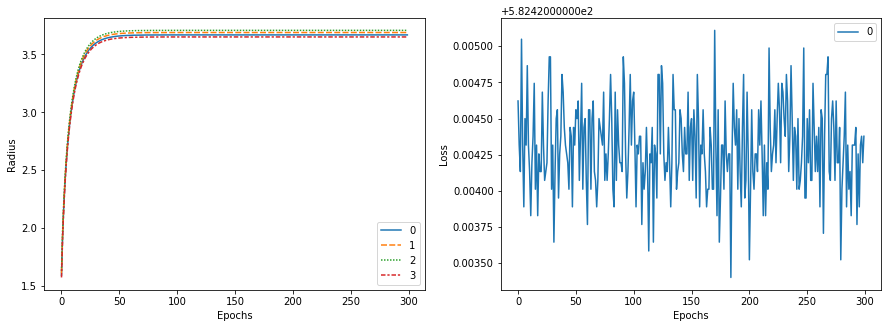

<tf.Variable 'boundary_loss/Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[1.5914145],
       [1.6121044],
       [1.6306918],
       [1.5737681]], dtype=float32)> <tf.Variable 'boundary_loss/Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[3.6685834],
       [3.6892867],
       [3.7078776],
       [3.6508813]], dtype=float32)>
euc_dis: tf.Tensor(
[14.150791    2.8050675   2.734181   27.926882    1.5991596   0.74011326
  6.730203   14.662344    4.2718525   4.950098    5.2632184  14.083304
 27.926882   13.677195    3.3504426   0.7917314  13.828972    2.6001651
  2.421035   27.926882    1.8723589   2.2773986   2.7448835   2.550417
  2.7588964   2.5012267   2.7918177   7.374345    3.9510484   2.531214
  8.915019    2.865412  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[3.6892867 3.7078776 3.7078776 3.6892867 3.7078776 3.7078776 3.6892867
 3.6892867 3.6685834 3.7078776 3.7078776 3.6892867 3.6892867 3.6892867
 3.7078776 3.7078776 3.6892867 3.6685834 3.6685834 3.6892

In [6]:
oset.plot_radius_chages()
print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
preds = oset.openpredict(oset.features)

In [7]:
preds = oset.openpredict(oset.features)

euc_dis: tf.Tensor(
[14.150791    2.8050675   2.734181   27.926882    1.5991596   0.74011326
  6.730203   14.662344    4.2718525   4.950098    5.2632184  14.083304
 27.926882   13.677195    3.3504426   0.7917314  13.828972    2.6001651
  2.421035   27.926882    1.8723589   2.2773986   2.7448835   2.550417
  2.7588964   2.5012267   2.7918177   7.374345    3.9510484   2.531214
  8.915019    2.865412  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[3.6892867 3.7078776 3.7078776 3.6892867 3.7078776 3.7078776 3.6892867
 3.6892867 3.6685834 3.7078776 3.7078776 3.6892867 3.6892867 3.6892867
 3.7078776 3.7078776 3.6892867 3.6685834 3.6685834 3.6892867 3.7078776
 3.7078776 3.6685834 3.6685834 3.6685834 3.7078776 3.6685834 3.6508813
 3.6508813 3.7078776 3.6892867 3.6508813], shape=(32,), dtype=float32)
unknowns: tf.Tensor(
[ True False False  True False False  True  True  True  True  True  True
  True  True False False  True False False  True False False False False
 False False False  T

In [8]:
unknown_filter = tf.convert_to_tensor([ True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,
  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
  True,  True,  True,  True,  True,  True,  True,  True])
preds_np = preds.numpy()
print(preds_np)
unknown_filter_np = unknown_filter.numpy()
preds_np[unknown_filter_np]=9999
preds_np


[1 2 2 1 2 2 1 1 0 2 2 1 1 1 2 2 1 0 0 1 2 2 0 0 0 2 0 3 3 2 1 3]


array([9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999,    0, 9999, 9999,
       9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999,
       9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999, 9999],
      dtype=int64)

In [9]:
narr = np.array([elem.numpy() for elem in oset.radius_changes])
tnsr = tf.convert_to_tensor(narr)
print(tnsr.shape)
tpose = tf.transpose(tnsr)
print(tpose)
# t = tf.reshape(tpose, (300, 4))
# print(t)

(300, 4, 1)
tf.Tensor(
[[[1.5914145 1.9437635 2.1941726 ... 3.668589  3.6686068 3.6685834]
  [1.6121044 1.9644549 2.2148576 ... 3.6892157 3.689241  3.6892867]
  [1.6306918 1.9830351 2.2334464 ... 3.7078593 3.7078269 3.7078776]
  [1.5737681 1.9261116 2.1765258 ... 3.650961  3.650949  3.6508813]]], shape=(1, 4, 300), dtype=float32)


In [10]:
tpose.numpy()[0]

array([[1.5914145, 1.9437635, 2.1941726, ..., 3.668589 , 3.6686068,
        3.6685834],
       [1.6121044, 1.9644549, 2.2148576, ..., 3.6892157, 3.689241 ,
        3.6892867],
       [1.6306918, 1.9830351, 2.2334464, ..., 3.7078593, 3.7078269,
        3.7078776],
       [1.5737681, 1.9261116, 2.1765258, ..., 3.650961 , 3.650949 ,
        3.6508813]], dtype=float32)

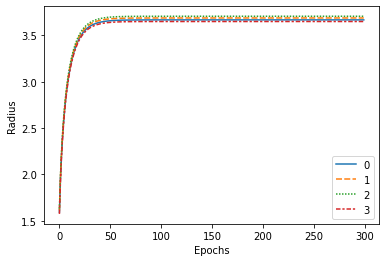

In [11]:

fig = sns.lineplot(data=[tpose.numpy()[0][0], 
                   tpose.numpy()[0][1],
                  tpose.numpy()[0][2],
                  tpose.numpy()[0][3]])
fig.set_xlabel("Epochs")
fig.set_ylabel("Radius")
# fig.set_yticklabels(['Red', 'Green', 'Blue'])
plt.show()
########

In [12]:
losses = [elem.numpy() for elem in oset.losses]

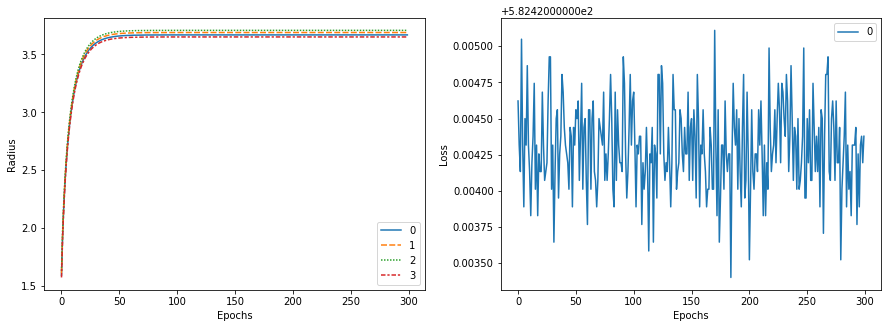

In [13]:
#########################
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1) # 1 row 2 column , first plot
fig = sns.lineplot(data=[tpose.numpy()[0][0], 
                   tpose.numpy()[0][1],
                  tpose.numpy()[0][2],
                  tpose.numpy()[0][3]])
fig.set_xlabel("Epochs")
fig.set_ylabel("Radius")
plt.subplot(1, 2, 2) # # 1 row 2 column , 2nd plot
fig2 = sns.lineplot(data=[losses])
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Loss")
plt.show()